Notes
-------
In this notebook, we gonna put the pre-trained models to the test with the test data, ie the held-out data.
Then, we'll compute some metrics that are better understood by the business, like Profit and ROI.

### Table of Contents

- [Get the best model](#Get-the-best-model)
- [Get the test data](#Get-the-test-data)
- [Testing time](#Testing-time)
- [Business metrics](#Business-metrics)
- [Changing the threshold of predicting default](#Changing-the-threshold-of-predicting-default)
- [Plotting Gross Profit as a function of model threshold](#Plotting-Gross-Profit-as-a-function-of-model-threshold)
- [Coda](#Coda)

In [1]:
# common imports

from IPython.display import display, HTML
from ipywidgets import *

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [2]:
# adjust settings to show all cols and rows
pd.options.display.max_columns = 80
pd.options.display.max_rows = 20

In [3]:
# to supress Warnings (if you've gotten tired of them) run this cell
import warnings
warnings.filterwarnings("ignore")

### Get the test data

In [4]:
# Load the test (ie held-out) data that have not been seen by the model yet
from LC_data_prep import load_and_prep_data, load_raw_rows

In [5]:
test_df = load_and_prep_data(load_test_data=True)

In [6]:
# set X and y
X = test_df.iloc[:,1:] # predictor variables
y = test_df["DEFAULT"] # response/target variable 
X.shape, y.shape

((266215, 37), (266215,))

### Get the best models

In [7]:
from LC_MMS import MMS, plot_ROCs, plot_PRCs

In [8]:
# Load the models fitted with the train data to put them to the test
mms = MMS()

### Testing time

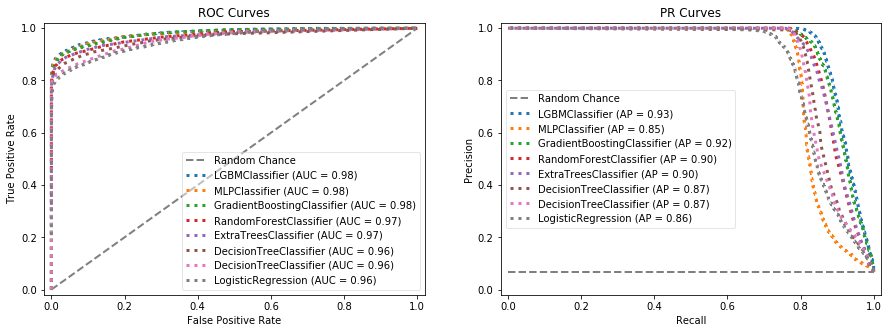

In [9]:
# plot the ROC and PRC curves against the test data
models_list = [ m[0] for m in mms.list_models(model_bins_too=True) ]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plot_ROCs(models_list, X, y, use_predict_proba=True, ax=ax1)
plot_PRCs(models_list, X, y, use_predict_proba=True, ax=ax2);    

In [10]:
# score the models' performances against the test data
model_list = []

for model in mms.list_models(model_bins_too=True):
    scores = mms.score_model(model[0], X, y, fit_and_add=False)  
    model_list.append( [model[0], model[1]] + scores )

Scoring model LGBMClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']
accuracy: 0.987 (std: 0.000)
precision: 0.993 (std: 0.001)
recall: 0.817 (std: 0.003)
f1: 0.897 (std: 0.002)
neg_log_loss: -0.049 (std: 0.000)
roc_auc: 0.981 (std: 0.000)


Using TensorFlow backend.


Scoring model StandardScaler-MLPClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']
accuracy: 0.985 (std: 0.001)
precision: 0.978 (std: 0.009)
recall: 0.777 (std: 0.007)
f1: 0.867 (std: 0.005)
neg_log_loss: -0.094 (std: 0.014)
roc_auc: 0.940 (std: 0.001)
Scoring model GradientBoostingClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']
accuracy: 0.985 (std: 0.000)
precision: 0.996 (std: 0.001)
recall: 0.782 (std: 0.006)
f1: 0.877 (std: 0.001)
neg_log_loss: -0.055 (std: 0.000)
roc_auc: 0.979 (std: 0.001)
Scoring model RandomForestClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']
accuracy: 0.985 (std: 0.000)
precision: 1.000 (std: 0.000)
recall: 0.775 (std: 0.009)
f1: 0.873 (std: 0.004)
neg_log_loss: -0.091 (std: 0.005)
roc_auc: 0.967 (std: 0.002)
Scoring model ExtraTreesClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']
accuracy: 0.984 (std: 0.000)
precision: 1.0

In [14]:
# display the scores (compare them with those against the training set in the prev notebook)

models_df = pd.DataFrame([_[1:] for _ in model_list], 
                         columns=['model_name','accuracy','precision','recall','f1','neg_log_loss','roc_auc'])
models_df.sort_values(by='roc_auc', ascending=False, inplace=True)
models_df

,model_name,accuracy,precision,recall,f1,neg_log_loss,roc_auc
0,LGBMClassifier,0.987326,0.993023,0.816639,0.896856,-0.048747,0.981191
2,GradientBoostingClassifier,0.985189,0.996088,0.781965,0.876519,-0.054771,0.979115
3,RandomForestClassifier,0.984790,0.999640,0.774874,0.872785,-0.090699,0.967363
4,ExtraTreesClassifier,0.984220,0.999636,0.766387,0.867641,-0.092210,0.966947
6,DecisionTreeClassifier,0.984663,0.982778,0.786991,0.874220,-0.088473,0.957932
7,LogisticRegression,0.948421,0.594164,0.829704,0.690970,-0.202627,0.956199
5,StackingEstimator-StackingEstimator-StackingEs...,0.984306,0.971405,0.787437,0.871335,-0.114717,0.955245
1,StandardScaler-MLPClassifier,0.984727,0.978103,0.776884,0.866736,-0.094173,0.939906


### Business metrics

In [15]:
# get the best model
the_best = mms.get_model(by_best_score='roc_auc')
the_best

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1)

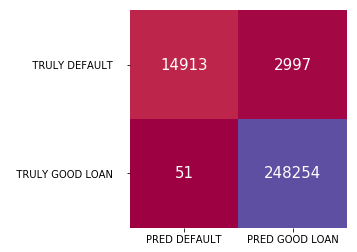

In [16]:
# display the confusion matrix
expected = y
predicted = the_best.predict(X)
cm = confusion_matrix(expected, predicted)

cm = cm[::-1,::-1] # reversed because of my habit
sns.heatmap(cm,
             cbar=False,
             cmap='Spectral', 
             annot=True,
             square=True,
             fmt='d',
             annot_kws={'size': 15},
             yticklabels=['   TRULY DEFAULT   ','   TRULY GOOD LOAN   '],
             xticklabels=['PRED DEFAULT', 'PRED GOOD LOAN']
            );

In [17]:
f = pd.DataFrame( np.c_[expected,pd.Series(predicted)], columns=['e','p'] )

In [18]:
# Positives
P = f[ f.e == 1 ].e.count()
P

17910

In [19]:
# Negatives
N = f[ f.e == 0 ].e.count()
N

248305

In [20]:
# True Positives
# ie the bad loans that were classified as bad ones
TP = f [ (f.e == 1) & (f.p == 1) ].p.count()
TP

14913

In [21]:
# False Negatives
# the bad loans that were classified as good ones (type II error in stat)
FN = f [ (f.e == 1) & (f.p == 0) ].p.count()
FN

2997

In [22]:
# False Positives
# ie the good loans that were classified as bad ones (type I error in stat)
FP = f [ (f.e == 0) & (f.p == 1) ].p.count()
FP

51

In [23]:
# True Negatives
# ie the good loans that were classified as good ones
TN = f [ (f.e == 0) & (f.p == 0) ].p.count()
TN

248254

In [24]:
PRECISION = TP / (TP+FP)
PRECISION

0.9965918203688853

In [25]:
RECALL = TP / (TP+FN)
RECALL

0.8326633165829146

In [27]:
# display interactive confusion matrix 
@interact(show_pct=Checkbox(value=False,description='%'))
def plot_confusion_matrix(show_pct):
    ct = pd.crosstab( f.e, f.p, rownames=['Expected'], colnames=['Predicted'], margins=True, normalize=show_pct)
    ct = ct.reindex(index=(1,0,'All'),columns=(1,0,'All'))
    if show_pct:
        ct = ct.applymap( lambda v: '{:.2f}%'.format(100*v) )
    ct.index = ['Truly Bad Loan', 'Truly Good Loan', 'Pred All']
    ct.columns = ['Pred Bad Loan', 'Pred Good Loan', 'Truly All'] 
    return ct

interactive(children=(Checkbox(value=False, description='%'), Output()), _dom_classes=('widget-interact',))

In [30]:
# load data with unmodified values
raw_df = load_raw_rows(load_test_data=True)

# add labels
raw_df_with_labels = test_df[["DEFAULT"]].join(raw_df, lsuffix='_test').reset_index()

pred_s = pd.Series(predicted)
pred_s.name = 'PRED'
assert len(pred_s) == len(raw_df_with_labels)

# concatenate best model predictions and the raw data
predictions_and_raw_df = pd.concat((pred_s,raw_df_with_labels), axis=1, ignore_index=False).set_index("id")

In [31]:
# calc the loss due to the defaults 
P_df = predictions_and_raw_df.query("DEFAULT==1")
bad_loan_loss = -1 * P_df.loan_amnt.sum()
"Bad Loan Loss: {:,.2f} (throughout the loans' period)".format(bad_loan_loss)

"Bad Loan Loss: -261,159,700.00 (throughout the loans' period)"

In [32]:
# calc the hypothetical loss due to False Negatives 
FN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==1")
bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()
"Bad Loan Loss with The Model: {:,.2f} (throughout the loans' period)".format(bad_loan_loss_with_the_model)

"Bad Loan Loss with The Model: -43,547,850.00 (throughout the loans' period)"

In [33]:
# calc the profit from good loans
N_df = predictions_and_raw_df.query("DEFAULT==0")
intrest_earned_s = N_df.loan_amnt * ( 1 + N_df.int_rate/12 )**N_df.term - N_df.loan_amnt
intrest_earned = intrest_earned_s.sum()
"Interest Earned: {:,.2f} (throughout the loans' periods)".format(intrest_earned)

"Interest Earned: 2,792,529,898.93 (throughout the loans' periods)"

In [34]:
# calc the hypothetical profit due to True Negatives 
TN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==0")
intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()
"Interest Earned with The Model: {:,.2f} (throughout the loans' periods)".format(intrest_earned_with_the_model)

"Interest Earned with The Model: 2,791,763,046.10 (throughout the loans' periods)"

In [35]:
# show the true profit
gross_profit = intrest_earned + bad_loan_loss
"Gross Profit/Loss: {:,.2f} (throughout the loans' period)".format(gross_profit)

"Gross Profit/Loss: 2,531,370,198.93 (throughout the loans' period)"

In [36]:
# show the hypothetical profit if the model were used
gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
"Gross Profit/Loss with The Model: {:,.2f} (throughout the loans' period)".format(gross_profit_with_the_model)

"Gross Profit/Loss with The Model: 2,748,215,196.10 (throughout the loans' period)"

In [37]:
# display ROI
roi = gross_profit/predictions_and_raw_df.loan_amnt.sum()
"ROI: {:,.2f} % (throughout the loans' period)".format(roi)

"ROI: 0.64 % (throughout the loans' period)"

In [38]:
# # display ROI if the model were used
roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
"ROI: {:,.2f} % (throughout the loans' period)".format(roi_with_the_model)

"ROI: 0.74 % (throughout the loans' period)"

HTML(value="<b style='font-size:16px'> The financial results for test data without the predictive model throughout the loans' periods. </b>")

HTML(value='<b style="font-size:16px"> Gross Profit = \\$2,531,370,198.93 [ROI = 0.64%] </b>')

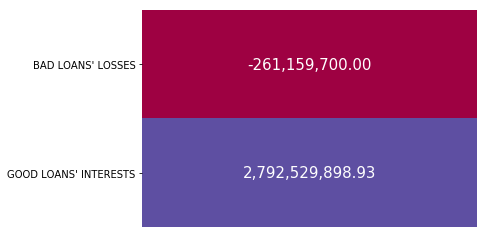

HTML(value="<b style='font-size:16px'>The results would have been better had the predictive model been deployed. </b>")

HTML(value='<b style="font-size:16px"> Gross Profit = \\$2,748,215,196.10 [ROI = 0.74%], i.e. savings with the predictive model= <u>\\$216,844,997</u> [ROI\'s lift=0.10%] </b>')

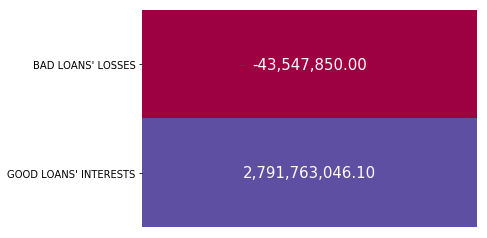

In [39]:
# show confusion matrices

display(HTML("<b style='font-size:16px'> The financial results for test data without the predictive model throughout the loans' periods. </b>"))
display(HTML(('<b style="font-size:16px"> Gross Profit = \${:,.2f} [ROI = {:.2f}%] </b>'
              .format(gross_profit,roi))))
        
sns.heatmap( [[bad_loan_loss], [intrest_earned]],
             cbar=False,
             cmap='Spectral', 
             annot=True,
             fmt=',.2f',
             annot_kws={'size': 15},
             xticklabels=[],
             yticklabels=["BAD LOANS' LOSSES","GOOD LOANS' INTERESTS"],
            )
plt.show()


display(HTML("<b style='font-size:16px'>The results would have been better had the predictive model been deployed. </b>"))
display(HTML(('<b style="font-size:16px"> Gross Profit = \${:,.2f} [ROI = {:.2f}%], i.e. savings with the predictive model= <u>\${:,.0f}</u> [ROI\'s lift={:.2f}%] </b>'
             .format(gross_profit_with_the_model,roi_with_the_model,(gross_profit_with_the_model-gross_profit),(roi_with_the_model-roi)))))
        
sns.heatmap( [[bad_loan_loss_with_the_model], [intrest_earned_with_the_model]],
             cbar=False,
             cmap='Spectral', 
             annot=True,
             fmt=',.2f',
             annot_kws={'size': 15},
             xticklabels=[],
             yticklabels=["BAD LOANS' LOSSES","GOOD LOANS' INTERESTS"],
            )
plt.show()

### Changing the threshold of predicting default

In [41]:
# Enable interactive setting of the threshold 
# if the predicted proba of default is greater then the threshold then the case is counted as DEFAULT

raw_df = load_raw_rows(load_test_data=True)
expected = y
raw_df_with_labels = pd.DataFrame(expected).join(raw_df, lsuffix='_test').reset_index()
predict_default_proba = the_best.predict_proba(X)[:,1]

@interact(Threshold=FloatSlider(value=.5,min=0,max=1,step=0.01),
          Pct=Checkbox(value=False,description='Cross tab data as %'),
          Show_Plot=Checkbox(value=False,description='Show Plot'))
def plot_confusion_matrix(Threshold,Pct,Show_Plot):
    
    if Threshold == 1:
        predicted_t = np.zeros( len(predict_default_proba) )
    elif Threshold == 0:
        predicted_t = np.ones( len(predict_default_proba) )
    else:
        predicted_t = np.where( predict_default_proba >= Threshold, 1, 0) 

    ct = pd.crosstab(expected, predicted_t, 
                     rownames=['Expected'], colnames=['Predicted'], 
                     margins=True, normalize=Pct)
    ct = ct.reindex(index=(1,0,'All'),columns=(1,0,'All'))
    ct.fillna(0,inplace=True)
    
    if Pct:
        ct = ct.applymap( lambda v: '{:.2f}%'.format(100*v) )

    ct.index = ['Truly Bad Loan', 'Truly Good Loan', 'Pred All']
    ct.columns = ['Pred Bad Loan', 'Pred Good Loan', 'Truly All']
    
    pred_t_s = pd.Series(predicted_t)
    pred_t_s.name = 'PRED'
    assert len(pred_t_s) == len(raw_df_with_labels)
    predictions_and_raw_df = pd.concat((pred_t_s,raw_df_with_labels), axis=1, ignore_index=False).set_index("id")
    
    # bad loan losses
    FN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==1")
    bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()
    print("The pct threshold for loan default: {:d}%".format(int(100*Threshold)))
    print("Bad Loan Losses: {:,.2f}".format(bad_loan_loss_with_the_model))
    
    # interest earned
    TN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==0")
    intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
    intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()
    print("Interest Earned: {:,.2f}".format(intrest_earned_with_the_model))
    
    # gross profit, ROI
    gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
    roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
    print("Gross Profit/Loss: {:,.2f} [ROI: {:,.3f}%]".format(gross_profit_with_the_model,roi_with_the_model))
    
    # plot bars
    if Show_Plot:
        plt.figure(figsize=(6,2))
        pd.Series({ 'Interest':intrest_earned_with_the_model,
                    'Losses':bad_loan_loss_with_the_model,
                    'Gross Profit':gross_profit_with_the_model } 
                 ).plot.bar(colormap='viridis')
        plt.grid()

    return ct

interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Checkbox(value=False, description='Cross tab data as %'), Checkbox(value=False, description='Show Plot'), Output()), _dom_classes=('widget-interact',))

### Plotting Gross Profit as a function of model threshold

In [43]:
gross_profit_or_loss = []
gross_roi = []

for Threshold in np.linspace(0.01,.99,98):
    
    predicted_t = np.where( predict_default_proba >= Threshold, 1, 0) 

    pred_t_s = pd.Series(predicted_t)
    pred_t_s.name = 'PRED'
    assert len(pred_t_s) == len(raw_df_with_labels)
    predictions_and_raw_df = pd.concat((pred_t_s,raw_df_with_labels), axis=1, ignore_index=False).set_index("id")

    # bad loan losses
    FN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==1")
    bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()

    # interest earned
    TN_df = predictions_and_raw_df.query("PRED==0 & DEFAULT==0")
    intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
    intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()

    # gross profit, ROI
    gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
    roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
    
    # collect metrics 
    gross_profit_or_loss.append(gross_profit_with_the_model)
    gross_roi.append(roi_with_the_model)

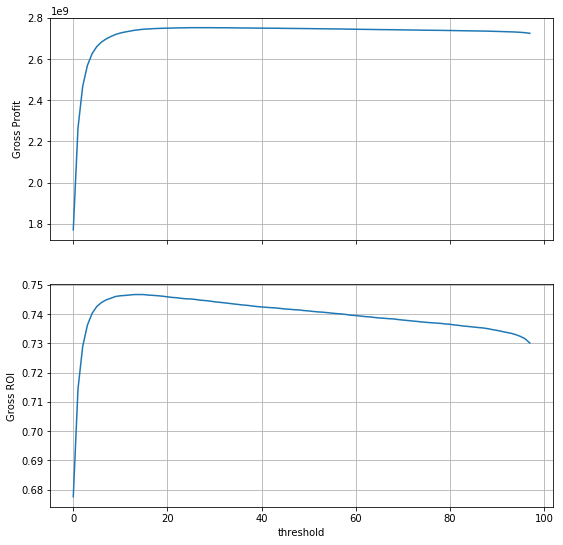

In [44]:
f, (a1,a2) = plt.subplots(2,1,sharex=True, figsize=(9,9))
a1.plot(gross_profit_or_loss)
a1.set_ylabel('Gross Profit')
a1.grid()
a2.plot(gross_roi)
a2.set_ylabel('Gross ROI')
a2.set_xlabel('threshold')
a2.grid()

### Coda

This is not the end of story. We still need to present the results of our modeling so that a common understanding could be reached. Then, the decisions need to be made whether or not to put the model to use. 

In the next iterations, the following ideas may be pursued:
- in training, use some other metrics that may be more meaningful to the business, like EV[NPV]
- enrich the data with feature engineering or feature learning
- use more sophisticated DNN (theoretically, any model that is not a DNN can be implemented as such; it is only the matter of a proper architecture/topology, training data, methods, resources, and time to have such DNN outperform the other models)
- try some unsupervised methods for anomaly detection, clustering, autoencoders; it might reveal something new
- ???

Data exploration and model development is not a sequential process. New findings and insigts tend to change the work path abraptly. There are some common themes though that is good to keep in mind:

    S trategic aligment - make sure that the time, effort, and money are wisely spent
    M etrics - should guide you on you journey to go in the right directions
    A nalytics - helps extract unbiased insights and get wiser in the data investigations
    R eporting - communicates ideas and develops common understanding of a problem/opportunity
    T ransformation - ongoing every day lest the uncovered insights are wasted

###### [Next: *5 model presentation*](Predicting-Loan-Defaults-5-model-presentation.ipynb)